<a href="https://colab.research.google.com/github/iSS1337/CV1_Laboratory/blob/main/exercitiu_filter_Lenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt

def sp_noise_efficient(image, prob):
    '''
    prob: Probabilitatea TOTALĂ de zgomot
    '''
    # 1. Pornește de la o COPIE, nu de la zero.
    output = np.copy(image)
    thres = 1 - prob # Pragul pentru a PĂSTRA pixelul

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()

            # Verifici doar dacă trebuie să adaugi zgomot
            if rdn >= thres: # (Sau, echivalent: 'if rdn < prob')
                # Pixelul ăsta (ex: 10% din ei) e cu zgomot.
                # Acum decide 50/50 dacă e salt sau pepper.
                if random.random() < 0.5:
                    output[i][j] = 0  # Pepper
                else:
                    output[i][j] = 255 # Salt

            # else:
                # Nu faci nimic. Pixelul e deja corect din np.copy()

    return output

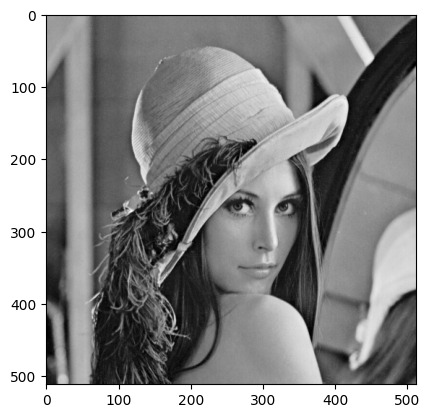

In [128]:
img_path = "/content/Lenna/lenna.png"
img = cv2.imread(img_path, 0)
plt.imshow(img, cmap = 'gray')

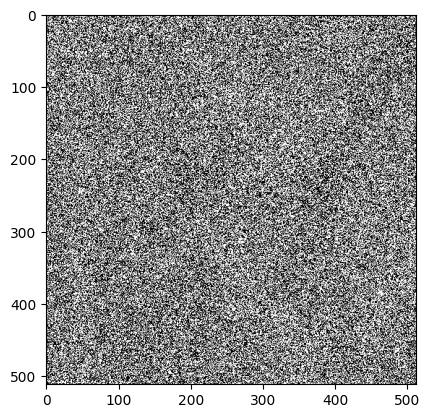

In [151]:
noisy_image = sp_noise_efficient(img,0.9)
plt.imshow(noisy_image, cmap = 'gray')

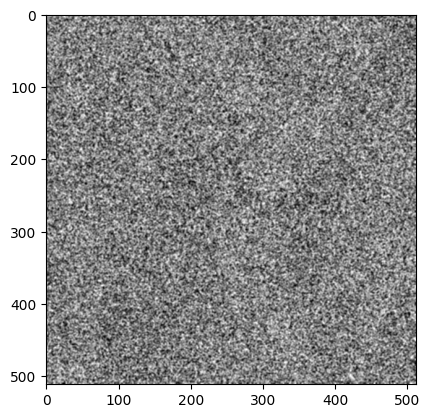

In [130]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(noisy_image,-1,kernel)
plt.imshow(dst, cmap = 'gray')


In [154]:
def filtru_siva(img_in,dim):
  img= img_in.copy()

  for i in range(dim,img.shape[0]-dim):
        for j in range(dim,img.shape[1]-dim):
          if img_in[i,j] != 0 and img_in[i,j] != 255:
            continue
          t = img_in[i-int(dim):i+int(dim),j-int(dim):j+int(dim)]
          ar = np.array(t).flatten()
          # ar = t.reshape(-1)
          ar_sort = np.sort(ar)

          img[i,j] = ar_sort[int(len(ar)/2)]
  return img

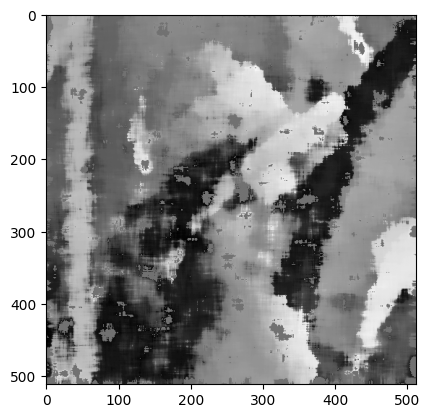

In [131]:
 dst = cv2.medianBlur(noisy_image, 21)
 dst[dst == 0 ] = 127
 dst[dst == 255 ] = 127
 plt.imshow(dst, cmap = 'gray')

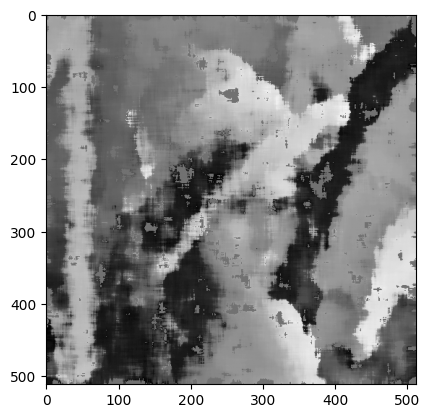

In [158]:
dst = cv2.medianBlur(noisy_image, 21)
dst[dst == 0 ] = 127
dst[dst == 255 ] = 127
plt.imshow(dst, cmap = 'gray')

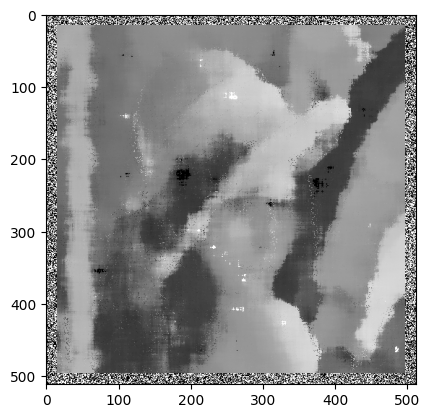

In [157]:
dst = filtru_siva(noisy_image, 15)
plt.imshow(dst, cmap = 'gray')
